# Analysis exploratorio Titanic

Vamos a realizar un analisis para poder entender nuestros datos

## 1 Cargamos y describimos la data

In [5]:
# Cargamos las librerias necesarias
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv("cienciadedatosenaws/episodio1/data.csv")

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
data.shape

(418, 12)

In [9]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Vamos a ver que variables categoricas tenemos en el dataset

In [11]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)
data[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [12]:
data[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## 2 ¿Necesitamos todas las variables?

PassengerId: Es u numero asignado de manera aleatoria, no es muy probable que nos vaya a ofrecer informacion relevante

Survived: Indica si un pasajero sobrevivio o no

Las variables que describen mejor numericamente a los pasajeros son: Pclass, Sex, Age, SibSp, Parch, Fare y Embarked

Tenemos 3 categorias para considerar: Name, Ticket and Cabin.

In [13]:
data["Name"].head(15)

0                                      Kelly, Mr. James
1                      Wilkes, Mrs. James (Ellen Needs)
2                             Myles, Mr. Thomas Francis
3                                      Wirz, Mr. Albert
4          Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                            Svensson, Mr. Johan Cervin
6                                  Connolly, Miss. Kate
7                          Caldwell, Mr. Albert Francis
8             Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                               Davies, Mr. John Samuel
10                                     Ilieff, Mr. Ylio
11                           Jones, Mr. Charles Cresson
12        Snyder, Mrs. John Pillsbury (Nelle Stevenson)
13                                 Howard, Mr. Benjamin
14    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
Name: Name, dtype: object

In [14]:
data["Name"].describe()

count                  418
unique                 418
top       Kelly, Mr. James
freq                     1
Name: Name, dtype: object

In [15]:
data["Ticket"].head(15) 

0          330911
1          363272
2          240276
3          315154
4         3101298
5            7538
6          330972
7          248738
8            2657
9       A/4 48871
10         349220
11            694
12          21228
13          24065
14    W.E.P. 5734
Name: Ticket, dtype: object

In [16]:
data["Ticket"].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [17]:
data["Cabin"].head(15)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    B45
13    NaN
14    E31
Name: Cabin, dtype: object

In [18]:
data["Cabin"].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

Eliminamos las columnas que no ayudan a nuestro analisis

In [19]:
del data["PassengerId"]
del data["Ticket"]

## 3 Deberiamos transformar algunas variables?

Survived: deberiamos convertirlo a una variable categorica

In [20]:
new_survived = pd.Categorical(data["Survived"])
print(new_survived)
new_survived = new_survived.rename_categories(["Died","Survived"])
new_survived

[0, 1, 0, 0, 1, ..., 0, 1, 0, 0, 0]
Length: 418
Categories (2, int64): [0, 1]


['Died', 'Survived', 'Died', 'Died', 'Survived', ..., 'Died', 'Survived', 'Died', 'Died', 'Died']
Length: 418
Categories (2, object): ['Died', 'Survived']

In [21]:
new_survived.describe()

,counts,freqs
categories,,
Died,266,0.636364
Survived,152,0.363636


In [22]:
data["Survived"] = new_survived

Pclass: Indica la clase del pasajero

In [23]:
new_Pclass = pd.Categorical(data["Pclass"],
                           ordered=True)
new_Pclass

[3, 3, 2, 3, 3, ..., 3, 1, 3, 3, 3]
Length: 418
Categories (3, int64): [1 < 2 < 3]

In [24]:
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])    
new_Pclass

['Class3', 'Class3', 'Class2', 'Class3', 'Class3', ..., 'Class3', 'Class1', 'Class3', 'Class3', 'Class3']
Length: 418
Categories (3, object): ['Class1' < 'Class2' < 'Class3']

In [25]:
new_Pclass.describe()

,counts,freqs
categories,,
Class1,107,0.255981
Class2,93,0.222488
Class3,218,0.521531


In [26]:
data["Pclass"] = new_Pclass

Cabin: Indica la cabian del pasajero

In [27]:
data["Cabin"].unique() 

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [28]:
char_cabin = data["Cabin"].astype(str) 
new_Cabin = np.array([cabin[0] for cabin in char_cabin])
new_Cabin = pd.Categorical(new_Cabin)

In [29]:
new_Cabin .describe()

,counts,freqs
categories,,
A,7,0.016746
B,18,0.043062
C,35,0.083732
D,13,0.031100
E,9,0.021531
F,8,0.019139
G,1,0.002392
n,327,0.782297


In [30]:
data["Cabin"] = new_Cabin

## 4 ¿Existen valores de NA, valores atípicos u otros valores extraños?

In [31]:
data.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Cabin        0
Embarked     0
dtype: int64

In [32]:
data["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

Observe que el recuento de edad (712) es menor que el recuento total de filas del conjunto de datos (889). Esto indica datos faltantes. Podemos obtener los índices de fila de los valores faltantes con np.where()

In [33]:
missing = np.where(data["Age"].isnull() == True)
missing

(array([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
         84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
        132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
        199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
        256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
        292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
        380, 382, 384, 408, 410, 413, 416, 417]),)

In [34]:
len(missing[0])

86

Hay 86 valores nulos, no es una buena idea eliminar la columna, por que la edad es un factor importante para el analisis de este conjunto de datos. Podriamos tomar varias desiciones para llenar estos datos, algunos pueden ser:

Imputacion de datos
- Llenar los valores con 0s
- Llenar los valores con la media
- Llenar los valores con la mediana

Para escojer la mejor solucion vamos a ver el histograma de la edad

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

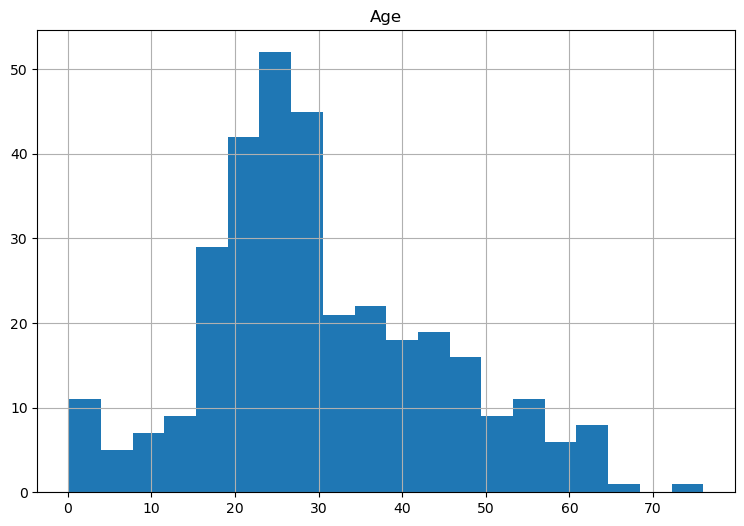

In [35]:
data.hist(column='Age',             # Columna que deseamos graficar
                   figsize=(9,6),   # Tamaño de la figura
                   bins=20)         # Numero de cajas

La mayoria de edades aproximadamente se concentran en 22 y 26, asi que elegiremos el numero 24 para llenar los valores nulos 

In [36]:
new_age_var = np.where(data["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       data["Age"])     # Value if check is false

data["Age"] = new_age_var 

In [37]:
data["Age"].describe()

count    418.000000
mean      29.805024
std       12.667969
min        0.170000
25%       23.000000
50%       28.000000
75%       35.750000
max       76.000000
Name: Age, dtype: float64

## 5 ¿Debeiamos crear nuevas variables?

Creemos una nueva variable, Familia, que combine SibSp y Parch para indicar el número total de familiares (hermanos, cónyuges, padres e hijos) que tiene un pasajero a bordo

In [38]:
data["Family"] = data["SibSp"] + data["Parch"]
most_family = np.where(data["Family"] == max(data["Family"]))
most_family

(array([188, 342, 360, 365]),)

In [39]:
data.loc[most_family]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
188,Survived,Class3,"Sage, Miss. Ada",female,28.0,8,2,69.55,n,S,10
342,Died,Class3,"Sage, Mr. John George",male,28.0,1,9,69.55,n,S,10
360,Died,Class3,"Sage, Master. William Henry",male,14.5,8,2,69.55,n,S,10
365,Survived,Class3,"Sage, Mrs. John (Annie Bullen)",female,28.0,1,9,69.55,n,S,10


## 6 Conclusiones

- La mayoria de pasajero tiene entre 30 y 20 años
- 152 Sobrevivientes y 266 fallecidos